<a href="https://colab.research.google.com/github/LanceryH/Thesis/blob/main/scripts/astrodynamic/ESA_M%C3%A0ni_Orbit_precession.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The objectif: characterizing the precession for Màni
### Author - **Hugo Lancery**


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

precession_deg = 1.03                  # Orbital precession (degrees per orbit)
semi_major_axis_m = 1.7874e6           # Semi-major axis of the orbit (meters)
gravitational_constant = 6.6743e-11    # Universal gravitational constant (m³/kg/s²)
moon_mass_kg = 7.3476e22               # Mass of the Moon (kg)
moon_radius_m = 1.7374e6               # Radius of the Moon (m)
moon_sidereal_period_days = 27.321     # Moon’s rotation period relative to stars (days)
moon_synodic_period_days = 29.53       # Moon’s rotation period relative to the Sun (days)
inclination_deg = 84                   # Orbital inclination relative to lunar equator (degrees)
eccentricity = 0.001                   # Near-circular orbit
J2 = 0.0002027                         # Moon's J2 coefficient (oblateness factor)

mue = gravitational_constant * moon_mass_kg
sat_orbital_period = 2 * np.pi * np.sqrt(semi_major_axis_m**3 / mue) # Orbital period (s)
revisit_period_days = (sat_orbital_period / 3600) * (360 / precession_deg) / 24 # Days to revisit same point
sun_shift_deg = (revisit_period_days / moon_synodic_period_days - 1) * 360 # Sun shift during revisit period

print(f"A precession of {precession_deg}° implies ~{360/precession_deg:.2f} orbits to revisit the same ground point.")
print(f"Orbital period: {sat_orbital_period:.2f} seconds ≈ {sat_orbital_period/3600:.2f} hours.")
print(f"Time between same-point revisits: {revisit_period_days:.2f} days.")
print(f"Sun shift during revisit period: {sun_shift_deg:.2f}°.")

mean_motion_rad_s = np.sqrt(mue / semi_major_axis_m**3) # Mean motion (rad/s)
angular_speed_rad_s = 2 * np.pi / sat_orbital_period # Angular speed (rad/s)
nodal_precession_deg_per_sec = np.rad2deg(-3 * moon_radius_m**2 * J2 * angular_speed_rad_s * # RAAN (ascending node) precession rate (deg/s)
                                          np.cos(np.deg2rad(inclination_deg)) /
                                          (2 * (semi_major_axis_m * (1 - eccentricity**2))**2))
nodal_precession_deg_per_orbit = nodal_precession_deg_per_sec * sat_orbital_period # Total per orbit

print(f"Nodal precession per orbit: {nodal_precession_deg_per_orbit:.2f}°.")
 
orbits_per_day = 86400 / sat_orbital_period # Number of orbits per Earth day
deg_shift_per_synodic_cycle = precession_deg * orbits_per_day * moon_synodic_period_days # Deg shift in one synodic cycle
deg_shift_per_day = deg_shift_per_synodic_cycle / moon_synodic_period_days # Daily shift (deg)

print(f"Satellite shift: {deg_shift_per_synodic_cycle:.2f}° per lunar synodic cycle.")
print("This means ~2 revisits per lunar cycle!")

mission_duration_days = 360 * 2 # Total mission time (days)
total_passes = int(mission_duration_days / revisit_period_days) * 2 # Total number of passes (two per revisit cycle)
pass_times_days = np.arange(1, total_passes + 1) * (revisit_period_days / 2)  # Day of each pass
lunar_nodal_precession_deg = 86400 / sat_orbital_period * pass_times_days * nodal_precession_deg_per_orbit
sun_longitude_speed_deg_per_day = 360 / moon_synodic_period_days # Sun's apparent motion on Moon (deg/day)
subsolar_longitudes_deg = (pass_times_days * sun_longitude_speed_deg_per_day) % 360  # Subsolar longitudes
local_lunar_hours = (subsolar_longitudes_deg / 15) % 24 # Local lunar hour (24h format)
adjusted_subsolar_longitudes_deg = (subsolar_longitudes_deg + lunar_nodal_precession_deg) % 360
adjusted_local_lunar_hours = (adjusted_subsolar_longitudes_deg / 15) % 24

print(f"Sun's longitudinal motion speed: {sun_longitude_speed_deg_per_day:.2f}°/day.")
print(f"Local lunar times (hours) of revisit passes:\n{local_lunar_hours}")
print(f"Subsolar longitudes during passes:\n{subsolar_longitudes_deg}")
print(f"Adjusted Subsolar longitudes during passes:\n{adjusted_subsolar_longitudes_deg}")
print(f"Revisit frequency per sun cycle: {360/sun_shift_deg:.2f} revisits per full cycle.")


A precession of 1.03° implies ~349.51 orbits to revisit the same ground point.
Orbital period: 6780.11 seconds ≈ 1.88 hours.
Time between same-point revisits: 27.43 days.
Sun shift during revisit period: -25.63°.
Nodal precession per orbit: -0.01°.
Apsidal precession per orbit: -0.05°.
Satellite shift: 387.59° per lunar synodic cycle.
This means ~2 revisits per lunar cycle!
Sun's longitudinal motion speed: 12.19°/day.
Local lunar times (hours) of revisit passes:
[11.14567094 22.29134187  9.43701281 20.58268375  7.72835468 18.87402562
  6.01969656 17.16536749  4.31103843 15.45670937  2.6023803  13.74805124
  0.89372218 12.03939311 23.18506405 10.33073498 21.47640592  8.62207686
 19.76774779  6.91341873 18.05908967  5.2047606  16.35043154  3.49610248
 14.64177341  1.78744435 12.93311529  0.07878622 11.22445716 22.3701281
  9.51579903 20.66146997  7.80714091 18.95281184  6.09848278 17.24415372
  4.38982465 15.53549559  2.68116653 13.82683746  0.9725084  12.11817934
 23.26385027 10.4095212

In [2]:
#%matplotlib qt

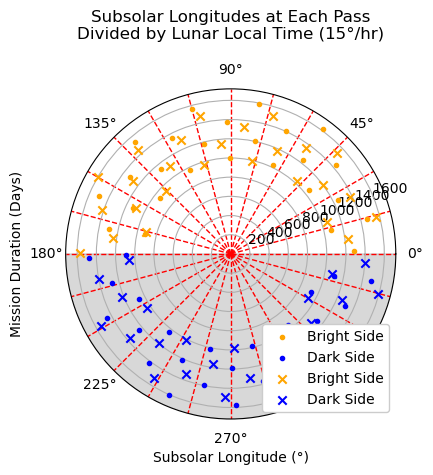

In [3]:
# === Polar Plot of Subsolar Longitudes Over Mission Duration ===
fig = plt.figure()
ax = fig.add_subplot(111, projection="polar")

# Create background fill area to show full mission timeline
theta = np.linspace(0, -np.pi, 100)
r_background = np.full_like(theta, 1000 + mission_duration_days)
ax.fill(theta, r_background, color="gray", alpha=0.3, zorder=0)

# Add red dashed radial lines for each hour of the lunar day (15° increments)
for hour in range(1, 25):
    ax.axvline(np.radians(hour * 15), zorder=1, color="red", linestyle="--", linewidth=1)

markers = [".", "x"]
for ind, sld in enumerate([subsolar_longitudes_deg, adjusted_subsolar_longitudes_deg]):
  # Separate passes by whether they occur on the bright or dark side of the Moon
  bright_passes = sld < 180
  dark_passes = sld > 180

  # Convert longitude to radians for plotting
  theta_bright = np.radians(sld[bright_passes])
  theta_dark = np.radians(sld[dark_passes])

  # Radial distance corresponds to time (higher = later)
  r_bright = 900 + pass_times_days[bright_passes]
  r_dark = 900 + pass_times_days[dark_passes]

  # Plot bright and dark side pass events
  ax.scatter(theta_bright, r_bright, marker=markers[ind], color="orange", zorder=2, label="Bright Side")
  ax.scatter(theta_dark, r_dark, marker=markers[ind], color="blue", zorder=2, label="Dark Side")

# Title and labels
fig.suptitle("Subsolar Longitudes at Each Pass\nDivided by Lunar Local Time (15°/hr)")
ax.set_xlabel("Subsolar Longitude (°)")
ax.set_ylabel("Mission Duration (Days)", labelpad=30)
ax.set_ylim(0, 1000 + mission_duration_days)
plt.grid(axis="x")
ax.legend(loc='lower right', framealpha=1)
plt.tight_layout()
plt.show()


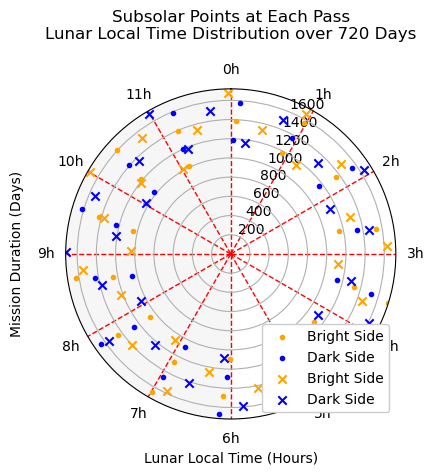

In [4]:
# === Polar Plot of Local Lunar Time for Each Subsolar Pass ===
fig = plt.figure()
ax = fig.add_subplot(111, projection="polar")

fig.suptitle(f"Subsolar Points at Each Pass\nLunar Local Time Distribution over {mission_duration_days} Days")

# Background circle (not essential but keeps layout consistent)
theta_bg = np.linspace(0, -np.pi, 100)
r_bg = np.full_like(theta_bg, mission_duration_days)
ax.fill(theta_bg, 1000 + r_bg, color="lightgray", alpha=0.2, zorder=0)

markers = [".", "x"]
for ind, (sld, llh) in enumerate(zip([subsolar_longitudes_deg, adjusted_subsolar_longitudes_deg],[local_lunar_hours, adjusted_local_lunar_hours])):
  # Define bright/dark passes
  bright_mask = sld < 180
  dark_mask = sld > 180

  # Convert lunar local time to radians (12h = full circle)
  theta_bright = np.deg2rad((llh[bright_mask] % 12) * 30)
  theta_dark = np.deg2rad((llh[dark_mask] % 12) * 30)

  # Radial coordinate is time (days)
  r_bright = 1000 + pass_times_days[bright_mask]
  r_dark = 1000 + pass_times_days[dark_mask]

  # Plot each set
  ax.scatter(theta_bright, r_bright, marker=markers[ind], color="orange", zorder=2, label="Bright Side")
  ax.scatter(theta_dark, r_dark, marker=markers[ind], color="blue", zorder=2, label="Dark Side")

# Set hour divisions (12 lunar hours = 360°)
ax.set_xticks(np.linspace(0, 2 * np.pi, 12, endpoint=False))
ax.set_xticklabels([f"{h}h" for h in range(12)])

# Add red dashed lines for hour markers
for h in range(1, 13):
    ax.axvline(np.radians(h * 30), zorder=1, color="red", linestyle="--", linewidth=1)

# Axis setup
ax.set_theta_direction(-1)  # Clockwise
ax.set_theta_offset(np.pi / 2)  # Noon at the top
ax.set_ylim(0, 1000 + mission_duration_days)
ax.set_xlabel("Lunar Local Time (Hours)")
ax.set_ylabel("Mission Duration (Days)", labelpad=30)

# Grid, layout, and legend
ax.grid(axis="x")
ax.legend(loc='lower right', framealpha=1)
plt.tight_layout()
plt.show()
